# CAPSTONE PROJECT - International Certification

## 1. Connect Colab to Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## 2. Import Packages

In [3]:
!pip install plotly==4.14.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.2 MB 8.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=1adee0e924ddf8f98902e247fd009020767166e6bbab3320da13916b0432154b
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [184]:
import os
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from numpy import random
from numpy import mean
from numpy.random import seed
import statistics
import scipy.stats as stats
from scipy.stats import chi2
from matplotlib import patches
from scipy.stats import ttest_1samp, ttest_ind
from datetime import date

In [186]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [187]:
import squarify 

## 3. Connect SQLite to Python

In [5]:
path = "/content/gdrive/MyDrive/IC CAPS/data/"
os.listdir(path)

['product_fashion_ratings.db', 'Ridha Product and Rating Fashion Site.csv']

In [6]:
conn = sqlite3.connect(path + 'product_fashion_ratings.db')

In [7]:
cur = conn.cursor()

In [8]:
cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
print(cur.fetchall())

[('products',), ('brand_details',), ('main_categories',), ('sub_categories',), ('item_details',), ('events',)]


## 4. Data Preparation Using SQL

In [9]:
pd.read_sql_query('SELECT * FROM products', conn)

,index,product_ID,product_name
0,0,1,Chapeau à Visière Anti-UV pour Protection Solaire
1,1,2,Écharpe longue 180cm à pois en broderie pour f...
2,2,3,Casquette de baseball de sport en plein air de...
3,3,4,Casquettes de Baseball Respirantes Unisexe Par...
4,4,5,LYZA Femmes Châle Surdimensionné Réversible Po...
...,...,...,...
13308,13308,13309,Sarouel décontracté à taille élastique
13309,13309,13310,Blouses à demi-manches à imprimé asymétrique
13310,13310,13311,Robe deux pièces décontractée
13311,13311,13312,Oreilles à capuche Cartoon Hoodie


In [10]:
pd.read_sql_query('SELECT * FROM brand_details', conn)

,index,brand_ID,brand_name,brand_url
0,0,1,Socofy-1,None
1,1,2,MEANBEAUTY,https://fr.newchic.com/meanbeauty-brand-1436.html
2,2,3,NUZADA,https://fr.newchic.com/nuzada-brand-1434.html
3,3,4,LYZA,https://fr.newchic.com/lyza-brand-1148.html
4,4,5,duni,https://fr.newchic.com/duni-brand-1396.html
...,...,...,...,...
414,414,415,BIMEI,https://fr.newchic.com/bimei-brand-1721.html
415,415,416,Veri Gude,https://fr.newchic.com/veri-gude-brand-1216.html
416,416,417,MC CLAYN,https://fr.newchic.com/mc-clayn-brand-1147.html
417,417,418,DAISSIONI,https://fr.newchic.com/daissioni-brand-1128.html


In [11]:
pd.read_sql_query('SELECT * FROM main_categories', conn)

,index,category_ID,category_name
0,0,1,accessories
1,1,2,bags
2,2,3,beauty
3,3,4,house
4,4,5,jewelry
5,5,6,kids
6,6,7,men
7,7,8,shoes
8,8,9,women


In [12]:
pd.read_sql_query('SELECT * FROM sub_categories', conn)

,index,subcategory_ID,subcategory_name
0,0,1,Écriture & Peinture
1,1,2,Épilateur
2,2,3,Éponges
3,3,4,Étui & Étagère
4,4,5,Étui & Sac des monnaies
...,...,...,...
446,446,447,Wine Decanters
447,447,448,Wine Glasses
448,448,449,Wine Racks
449,449,450,Wine Stoppers


In [13]:
pd.read_sql_query('SELECT * FROM item_details', conn)

,index,item_ID,product_ID,variation_0_color,variation_1_color
0,0,1,1,Bleu ciel,Gris
1,1,2,2,armée verte,Bleu
2,2,3,3,#1,#2
3,3,4,4,rouge,Bleu
4,4,5,5,Rose,Bleu
...,...,...,...,...,...
13984,13984,13985,13309,armée verte,kaki
13985,13985,13986,13310,Noir,blanc
13986,13986,13987,13311,Green,Yellow
13987,13987,13988,13312,Pink,Navy


In [14]:
pd.read_sql_query('SELECT * FROM events', conn)

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,current_price,perc.discount,likes_count,is_new,codCountry
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,21.48 USD,42.0,285,0,"ID,MY,PH,SG,TH,VN"
1,1,42560,SKU028546,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/plus-size-blouses-and-s...,9862,396,9,98,10372,22.99 USD,65.0,147,0,"ID,MY,PH,SG,TH,VN"
2,2,45211,SKU031964,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/beon-vehicle-supplies-5...,3620,246,4,232,3658,1.59 USD,58.0,1,0,"ID,MY,PH,SG,TH,VN"
3,3,48169,SKU037769,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/y-f-m-face-care-tools-5...,1144,73,3,10,1168,19.03 USD,43.0,500,0,"ID,MY,PH,SG,TH,VN"
4,4,51841,SKU039460,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/t-shirts-3666/p-51841.html,9315,396,9,427,9761,21.99 USD,0.0,251,0,"ID,MY,PH,SG,TH,VN"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,14156,1723915,SKUF75050,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8824,20,8,101,9143,29.99 USD,55.0,2,1,"ID,MY,PH,SG,TH,VN"
14157,14157,1723920,SKUF74844,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8835,20,8,101,9154,32.99 USD,53.0,2,1,"ID,MY,PH,SG,TH,VN"
14158,14158,1723924,SKUF74850,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-womens-slippers-...,8836,20,8,101,9155,32.99 USD,50.0,1,1,"ID,MY,PH,SG,TH,VN"
14159,14159,1723927,SKUF76422,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-flats-3615/p-17...,8798,378,8,142,9117,29.99 USD,50.0,2,1,"ID,MY,PH,SG,TH,VN"


**JOINING**

In [15]:
#Create dataframe

In [16]:
df_products_and_ratings = pd.read_sql_query("""
                  SELECT
                    e.*,
                    p.product_name,
                    bd.brand_name, bd.brand_url,
                    mc.category_name,
                    sc.subcategory_name,
                    id.variation_0_color, id.variation_1_color
                  FROM events e
                  LEFT JOIN products p ON e.product_ID = p.product_ID
                  LEFT JOIN brand_details bd ON e.brand_ID = bd.brand_ID
                  LEFT JOIN main_categories mc ON e.category_ID = mc.category_ID
                  LEFT JOIN sub_categories sc ON e.subcategory_ID = sc.subcategory_ID
                  LEFT JOIN item_details id ON e.item_ID = id.item_ID
                  """,conn)
df_products_and_ratings.head(1)

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,...,likes_count,is_new,codCountry,product_name,brand_name,brand_url,category_name,subcategory_name,variation_0_color,variation_1_color
0,0,27788,SKU585926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/loskii-wall-art-4619/p-...,4636,120,4,21,4677,...,285,0,"ID,MY,PH,SG,TH,VN",Mesure verticale horizontale de laser de nivea...,Loskii,https://fr.newchic.com/loskii-brand-347.html,house,ART MURAL,None,None


## 5. Problem Statement

1.   Which product categories are the most popular?
2.   What is the most popular product sub-category within each category?
3.   What are the most populer brands?
4.   Does the novelty of the product make a difference to consumers?
5.   Which countries are the biggest consumers of NewChic.com?
6.   What are the most popular colour variations per product?
7.   what is the relationship between likes count, current price, discount, product novelty, and raw price?

## 6. Data Preparation Using Python (Cleansing, Manipulation, Handling Outlier dst)

**DATA MANIPULATION**

In [17]:
#Check and change data type

In [18]:
df_products_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              14161 non-null  int64  
 1   ID                 14161 non-null  int64  
 2   sku                14161 non-null  object 
 3   image_url          14161 non-null  object 
 4   url_area           14161 non-null  object 
 5   product_ID         14161 non-null  int64  
 6   brand_ID           14161 non-null  int64  
 7   category_ID        14161 non-null  int64  
 8   subcategory_ID     14161 non-null  int64  
 9   item_ID            14161 non-null  int64  
 10  current_price      14151 non-null  object 
 11  perc.discount      14156 non-null  float64
 12  likes_count        14161 non-null  int64  
 13  is_new             14161 non-null  int64  
 14  codCountry         13018 non-null  object 
 15  product_name       14161 non-null  object 
 16  brand_name         141

In [19]:
change_columns = ['ID','product_ID','brand_ID','category_ID','subcategory_ID','item_ID']
for cc in change_columns :
  df_products_and_ratings[cc] = df_products_and_ratings[cc].astype(str)

In [20]:
df_products_and_ratings['is_new'] = df_products_and_ratings['is_new'].astype(bool)

**DATA WRANGLING**

In [22]:
# Remove the unit 'USD' in the current_price column and change the data type from str to float
df_products_and_ratings['current_price'] = df_products_and_ratings['current_price'].str.replace('USD','').astype(float)

In [23]:
df_products_and_ratings[['current_price']]

,current_price
0,21.48
1,22.99
2,1.59
3,19.03
4,21.99
...,...
14156,29.99
14157,32.99
14158,32.99
14159,29.99


In [24]:
df_products_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              14161 non-null  int64  
 1   ID                 14161 non-null  object 
 2   sku                14161 non-null  object 
 3   image_url          14161 non-null  object 
 4   url_area           14161 non-null  object 
 5   product_ID         14161 non-null  object 
 6   brand_ID           14161 non-null  object 
 7   category_ID        14161 non-null  object 
 8   subcategory_ID     14161 non-null  object 
 9   item_ID            14161 non-null  object 
 10  current_price      14151 non-null  float64
 11  perc.discount      14156 non-null  float64
 12  likes_count        14161 non-null  int64  
 13  is_new             14161 non-null  bool   
 14  codCountry         13018 non-null  object 
 15  product_name       14161 non-null  object 
 16  brand_name         141

**MISSING VALUE**

In [ ]:
#check Null in the table
df_products_and_ratings.loc[df_products_and_ratings.isna().any(axis=1)]

In [26]:
df_products_and_ratings.isnull().any()

index                False
ID                   False
sku                  False
image_url            False
url_area             False
product_ID           False
brand_ID             False
category_ID          False
subcategory_ID       False
item_ID              False
current_price         True
perc.discount         True
likes_count          False
is_new               False
codCountry            True
product_name         False
brand_name           False
brand_url             True
category_name        False
subcategory_name     False
variation_0_color     True
variation_1_color     True
dtype: bool

In [27]:
missing_amount = pd.isnull(df_products_and_ratings).sum()
missing_amount

index                   0
ID                      0
sku                     0
image_url               0
url_area                0
product_ID              0
brand_ID                0
category_ID             0
subcategory_ID          0
item_ID                 0
current_price          10
perc.discount           5
likes_count             0
is_new                  0
codCountry           1143
product_name            0
brand_name              0
brand_url            3821
category_name           0
subcategory_name        0
variation_0_color    2557
variation_1_color    4692
dtype: int64

In [28]:
ratio = missing_amount.div(len(df_products_and_ratings))
ratio

index                0.000000
ID                   0.000000
sku                  0.000000
image_url            0.000000
url_area             0.000000
product_ID           0.000000
brand_ID             0.000000
category_ID          0.000000
subcategory_ID       0.000000
item_ID              0.000000
current_price        0.000706
perc.discount        0.000353
likes_count          0.000000
is_new               0.000000
codCountry           0.080715
product_name         0.000000
brand_name           0.000000
brand_url            0.269826
category_name        0.000000
subcategory_name     0.000000
variation_0_color    0.180566
variation_1_color    0.331333
dtype: float64

The ratio of missing values ​​in the column [[current_price, perc.discount, codCountry, brand_url, variation_0_color, variation_1_color]] is below 60% so there is no need to delete missing data

**DUPLICATE**

In [29]:
# Identify whether there are duplicate values ​​in the table with reference to column ['ID'] or column ['sku']
df_products_and_ratings[df_products_and_ratings["ID"].duplicated(keep=False)].sort_values("ID")

,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,item_ID,...,likes_count,is_new,codCountry,product_name,brand_name,brand_url,category_name,subcategory_name,variation_0_color,variation_1_color
275,275,1054376,SKU396836,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/topacc-handmade-toys-50...,2223,160,4,213,2255,...,77,False,"ID,MY,PH,SG,TH,VN",Summer Romance DIY Dollhouse,Topacc,https://fr.newchic.com/topacc-brand-1051.html,house,Jouets faits à main,None,None
276,276,1054376,SKU396836,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/topacc-handmade-toys-50...,2223,160,4,213,2255,...,77,False,"ID,MY,PH,SG,TH,VN",Summer Romance DIY Dollhouse,Topacc,https://fr.newchic.com/topacc-brand-1051.html,house,Jouets faits à main,None,None
655,655,1113128,SKU544412,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-flats-3615/p-111...,7590,20,8,142,7780,...,12227,False,"ID,MY,PH,SG,TH,VN",Socofy Chaussures Plates Faites À La Main En C...,Socofy,https://fr.newchic.com/socofy-brand-298.html,shoes,Derbies & Mocassins,Jaune,Bleu
656,656,1113128,SKU544412,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/socofy-flats-3615/p-111...,7590,20,8,142,7780,...,12227,False,"ID,MY,PH,SG,TH,VN",Socofy Chaussures Plates Faites À La Main En C...,Socofy,https://fr.newchic.com/socofy-brand-298.html,shoes,Derbies & Mocassins,Jaune,Bleu
1122,1122,1153371,SKU643929,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/topacc-squishy-toys-505...,2327,160,4,215,2359,...,196,False,"ID,MY,PH,SG,TH,VN",Guitare Squishy Slow Rising Toy Squishy Tag So...,Topacc,https://fr.newchic.com/topacc-brand-1051.html,house,Jouets Squishy,rouge,Rose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13166,13166,1693840,SKUE46510,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/xiaomi-smart-watches-49...,5140,12,5,251,5181,...,19,False,"ID,MY,PH,SG,TH,VN",Bande d'origine Xiaomi Mi 5,XIAOMI,https://fr.newchic.com/xiaomi-brand-520.html,jewelry,Montres connectées,Noir,None
13314,13314,1703260,SKUF48706,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-womens-sandals-...,7584,378,8,353,7772,...,144,False,"ID,MY,PH,SG,TH,VN",Sandales à bride arrière en forme de T,Lostisy,https://fr.newchic.com/lostisy-brand-1714.html,shoes,Sandales & Mules,marron,vert
13313,13313,1703260,SKUF48706,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/lostisy-womens-sandals-...,7584,378,8,353,7772,...,144,False,"ID,MY,PH,SG,TH,VN",Sandales à bride arrière en forme de T,Lostisy,https://fr.newchic.com/lostisy-brand-1714.html,shoes,Sandales & Mules,marron,vert
12,12,78267,SKU039926,https://imgaz1.chiccdn.com/thumb/view/oaupload...,https://fr.newchic.com/kingso-wall-lamps-5395/...,2326,119,4,225,2358,...,2,False,"ID,MY,PH,SG,TH,VN",GU10 E27 Spot Light 16 SMD LED 5630 Lampe 7W à...,KingSo,https://fr.newchic.com/kingso-brand-9.html,house,Lampes sur mur,None,None


In [30]:
# remove duplicate values ​​in the table
df_products_and_ratings = df_products_and_ratings.drop_duplicates(subset=["ID"]).reset_index()

In [31]:
df_products_and_ratings[df_products_and_ratings["ID"].duplicated(keep=False)].sort_values("ID")

,level_0,index,ID,sku,image_url,url_area,product_ID,brand_ID,category_ID,subcategory_ID,...,likes_count,is_new,codCountry,product_name,brand_name,brand_url,category_name,subcategory_name,variation_0_color,variation_1_color


**REMOVING**

In [32]:
#Eliminate unnecessary columns in the analysis process

In [33]:
df_products_and_ratings_ver1 = df_products_and_ratings.drop(['level_0','image_url', 'url_area', 'brand_url'], axis=1)

**ADDING NEW COULMN (raw_price)**

In [34]:
df_products_and_ratings_ver1['raw_price'] = (df_products_and_ratings_ver1['current_price']/(1-(df_products_and_ratings_ver1['perc.discount']/100))).round(decimals=2)

## 7. Exploratory Data Analysis & Visualization

 **CATEGORY**

In [36]:
#Product categories with the highest popularity
category = df_products_and_ratings_ver1[['category_name','likes_count']].groupby('category_name').sum('likes_count').sort_values('likes_count', ascending=False)
category

,likes_count
category_name,
women,1510117
house,765715
shoes,753313
men,558775
bags,163241
beauty,117528
jewelry,65580
accessories,24107
kids,9537


Text(0, 0.5, 'Likes Count')

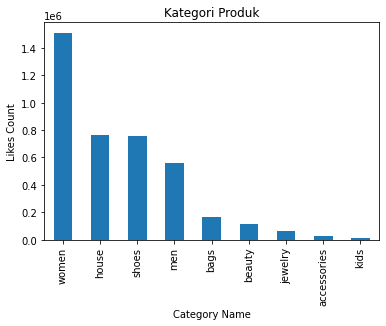

In [37]:
category['likes_count'].plot(kind='bar', title='test')
plt.title('Kategori Produk')
plt.xlabel('Category Name')
plt.ylabel('Likes Count')

Based on likes count, the most popular product categories are women's products, followed by home appliances, shoes, men's products, and bags.

**SUB CATEGORY PRODUCT**

In [227]:
#Knowing the most popular sub-category product in every category
catogry_SubCategory = df_products_and_ratings_ver1.groupby(['category_name','subcategory_name'])['likes_count'].sum().reset_index().sort_values('likes_count', ascending=False)
catogry_SubCategory

,category_name,subcategory_name,likes_count
425,women,Chemises,296009
390,men,Shirts,285335
405,shoes,Bottes & Bottines,257213
421,women,Blouses & Chemises,191972
448,women,Robes imprimées,156260
...,...,...,...
24,beauty,Autres accessoires,6
141,house,Chats,5
78,beauty,Soins de bain,2
416,shoes,Slipper,2


In [68]:
catogry_SubCategory.nlargest(n=10, columns = ['likes_count'])

,category_name,subcategory_name,likes_count
425,women,Chemises,296009
390,men,Shirts,285335
405,shoes,Bottes & Bottines,257213
421,women,Blouses & Chemises,191972
448,women,Robes imprimées,156260
410,shoes,Derbies & Mocassins,150721
464,women,Vestes & Gilets,135877
415,shoes,Sandales & Mules,134247
443,women,PANTALONS & SHORTS,130583
451,women,Robes vintage,129135


In [ ]:
catogry_SubCategory_ver1 = catogry_SubCategory.groupby(['category_name','subcategory_name'])['likes_count'].sum().reset_index()
catogry_SubCategory_ver1

In [206]:
fig = px.treemap(catogry_SubCategory_ver1, path=[px.Constant("Total"), 'category_name','subcategory_name'], values='likes_count',
                  color='likes_count', title="Popularity of Sub-category Product in Every Category")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

From each category we can find out the most popular product sub categories. for example in 


*   **women's** product the most popular **sub category** is **chemises** (English = Shirts), 
*   **house** product the most popular **sub category** is **Flowers**,
*   **shoes** product the most popular **sub category** is **Bottes & Bottines**,
*   **men's** product the most popular **sub category** is **shirts**,
*   **bags** product the most popular **sub category** is **sac bandoulière** (English = shoulder bag),
*   **beauty** product the most popular **sub category** is **fard a paupière** (English = eye shadow),
*   **jewelry** product the most popular **sub category** is **montres pour homme** (English = watches for men)
*   **accessories** product the most popular **sub category** is **foulards echarpes** (English = scarves)
*   **kids** product the most popular **sub category** is **robes** (English = dresses)







    

**BRAND**

In [215]:
brand = df_products_and_ratings_ver1[['brand_name','likes_count']].groupby('brand_name').sum('likes_count').sort_values('likes_count', ascending=False)
brand

,likes_count
brand_name,
Socofy,502754
ZANZEA,462390
O-NEWE,435281
ChArmkpR,323283
Gracila,202097
...,...
Convoy,2
BEON,1
senbono,1


In [216]:
#Top 20 Brand Popularity
brand_top_20 = brand.nlargest(n=20, columns = ['likes_count'])
brand_top_20

,likes_count
brand_name,
Socofy,502754
ZANZEA,462390
O-NEWE,435281
ChArmkpR,323283
Gracila,202097
Egrow,174420
Lostisy,132105
Honana,120453
ZHI,115516


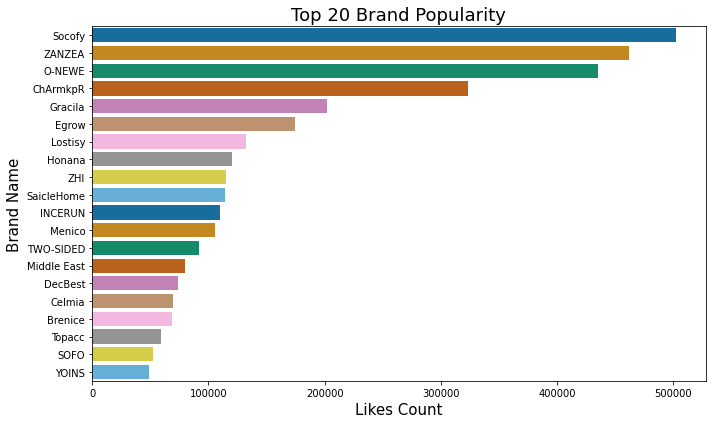

In [224]:
brand_top_20['brand_name'] = brand_top_20.index

plt.figure(figsize=(10,6))
sns.barplot(data = brand_top_20
            ,x = 'likes_count'
            ,y = 'brand_name' 
            
            ,palette = "colorblind")



plt.xlabel("Likes Count", size=15)
plt.ylabel("Brand Name", size=15)
plt.title("Top 20 Brand Popularity", size=18)
plt.tight_layout()

Brand with the highest popularity is socofy  then followed by brand zanzea. The popularity of other brands is illustrated in the visualization above

In [225]:
#bottom 20 brand
brand_bottom_20 = brand.nsmallest(n=20, columns = ['likes_count'])
brand_bottom_20

,likes_count
brand_name,
Doufit,0
CAMEL,0
BEON,1
senbono,1
NEXTOOL,2
Convoy,2
MAHATON,3
Miaomiaoce,3
SEAGO,4


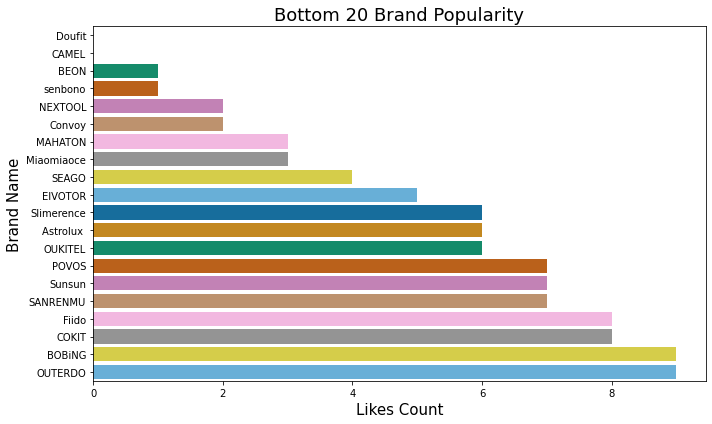

In [226]:
brand_bottom_20['brand_name'] = brand_bottom_20.index

plt.figure(figsize=(10,6))
sns.barplot(data = brand_bottom_20
            ,x = 'likes_count'
            ,y = 'brand_name' 
            
            ,palette = "colorblind")



plt.xlabel("Likes Count", size=15)
plt.ylabel("Brand Name", size=15)
plt.title("Bottom 20 Brand Popularity", size=18)
plt.tight_layout()

least popular brand are Doufit and Camel

**PRODUCT NOVELTY**

In [43]:
#check how many new and non-new items are provided
False_count, true_count = df_products_and_ratings_ver1.is_new.value_counts().sort_index().tolist()
False_count, true_count

(13513, 586)

In [180]:
#check the popularity between new product and non-new product based on likes count
product_novalty = df_products_and_ratings_ver1[['is_new','likes_count']].groupby('is_new').sum('likes_count').sort_values('likes_count', ascending=False)
product_novalty

,likes_count
is_new,
False,3965518
True,2395


Text(0.5, 1.0, 'Product Novalty Percentage')

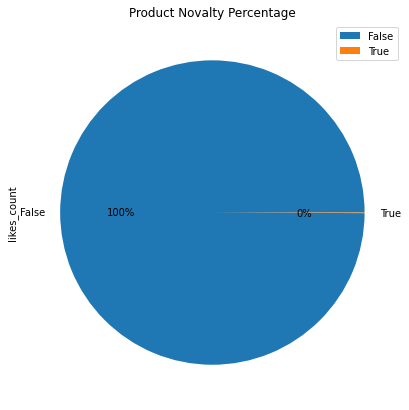

In [45]:
product_novalty.plot(kind='pie', y='likes_count', autopct='%1.0f%%', figsize=(10,7))
plt.title('Product Novalty Percentage')

Based on the proportion of likes_count, the novelty of the product is not a problem for potential customers, it is proven that the likes_count of the non-new product is many times more than the new product.

**CUSTOMER COUNTRY**

In [181]:
#split the country
country_split = df_products_and_ratings_ver1['codCountry'].str.split(',', n=-1, expand=True).reset_index()
country_split.head()

,index,0,1,2,3,4,5
0,0,ID,MY,PH,SG,TH,VN
1,1,ID,MY,PH,SG,TH,VN
2,2,ID,MY,PH,SG,TH,VN
3,3,ID,MY,PH,SG,TH,VN
4,4,ID,MY,PH,SG,TH,VN


In [115]:
country_count = country_split.apply(pd.value_counts).reindex(['ID','MY', 'PH', 'SG', 'TH', 'VN'])
country_count.reset_index()

,level_0,index,0,1,2,3,4,5
0,ID,NaN,12290.0,NaN,NaN,NaN,NaN,NaN
1,MY,NaN,4.0,12290.0,NaN,NaN,NaN,NaN
2,PH,NaN,449.0,4.0,12254.0,NaN,NaN,NaN
3,SG,NaN,2.0,1.0,4.0,12254.0,NaN,NaN
4,TH,NaN,166.0,448.0,37.0,4.0,12254.0,NaN
5,VN,NaN,47.0,14.0,448.0,1.0,3.0,12254.0


In [182]:
#count the occurrences of each country
country_count_ver1 = country_count.drop(['index'], axis=1)
data_country = country_count_ver1.reset_index().rename(columns={'index':'country'})
data_country

,country,0,1,2,3,4,5
0,ID,12290.0,NaN,NaN,NaN,NaN,NaN
1,MY,4.0,12290.0,NaN,NaN,NaN,NaN
2,PH,449.0,4.0,12254.0,NaN,NaN,NaN
3,SG,2.0,1.0,4.0,12254.0,NaN,NaN
4,TH,166.0,448.0,37.0,4.0,12254.0,NaN
5,VN,47.0,14.0,448.0,1.0,3.0,12254.0


In [157]:
#sum up
data_country['country_count'] = data_country.iloc[-6:].sum(axis=1)
data_country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


,country,0,1,2,3,4,5,country_count
0,ID,12290.0,NaN,NaN,NaN,NaN,NaN,12290.0
1,MY,4.0,12290.0,NaN,NaN,NaN,NaN,12294.0
2,PH,449.0,4.0,12254.0,NaN,NaN,NaN,12707.0
3,SG,2.0,1.0,4.0,12254.0,NaN,NaN,12261.0
4,TH,166.0,448.0,37.0,4.0,12254.0,NaN,12909.0
5,VN,47.0,14.0,448.0,1.0,3.0,12254.0,12767.0


In [172]:
data_country_sort = data_country.sort_values(by=['country_count'],ascending=False)
data_country_sort

,country,0,1,2,3,4,5,country_count
4,TH,166.0,448.0,37.0,4.0,12254.0,NaN,12909.0
5,VN,47.0,14.0,448.0,1.0,3.0,12254.0,12767.0
2,PH,449.0,4.0,12254.0,NaN,NaN,NaN,12707.0
1,MY,4.0,12290.0,NaN,NaN,NaN,NaN,12294.0
0,ID,12290.0,NaN,NaN,NaN,NaN,NaN,12290.0
3,SG,2.0,1.0,4.0,12254.0,NaN,NaN,12261.0


Text(0, 0.5, 'country count')

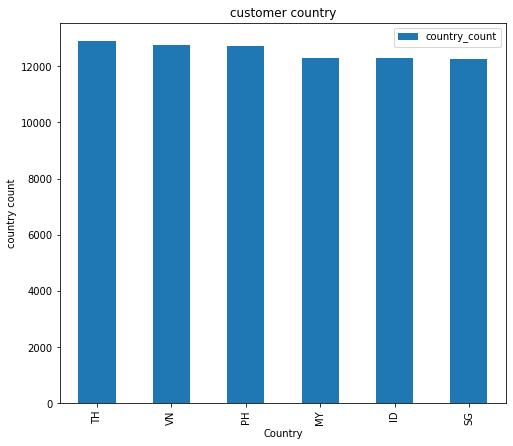

In [176]:
data_country_sort.plot(kind='bar', y='country_count', x='country', figsize=(8,7))

plt.title('customer country')
plt.xlabel('Country')
plt.ylabel('country count')

Customer activity in the six countries is not very different, the country with the largest activity is Thailand.

**FAVORITE COLOR VARIATION**

In [51]:
#top 10 products with favorite color variations
product_variation_color = df_products_and_ratings_ver1[['product_name','likes_count','variation_0_color','variation_1_color']].groupby(['product_name','variation_0_color','variation_1_color']).sum('likes_count').sort_values('likes_count', ascending=False)
product_variation_color.nlargest(n=10, columns = ['likes_count'])

,,,likes_count
product_name,variation_0_color,variation_1_color,
Chaussures De Grande Taille Semelle Souple À Enfiler Mocassins Plats En Couleur Pure Avec Lacet,Noir,Vin rouge,15203
Bottines Plates Doublées de Fourrure,Noir,Marine,13615
Manteau imprimé floral à feuilles à capuche,Jaune,rouge,12482
Socofy Chaussures Plates Faites À La Main En Cuir Véritable Mocassins Souples Style Fleuri,Jaune,Bleu,12227
SOCOFY Sandales Vintage Colorées,Bleu,vert,12005
Manteau Imprimé à Capuche,Jaune,rouge,10965
SOCOFY Bottes Plates Coupe Genou en Cuir,vert,marron,10146
Chemisier Couleur Pure Coupe Irrégulière pour Femme,Rose,Vin rouge,9841
Robe brodée à imprimé floral en patchwork,rouge,Bleu foncé,9692



the product with the highest popularity is  

*   *Chaussures De Grande Taille Semelle Souple À Enfiler Mocassins Plats En Couleur Pure Avec Lacet* **(women's shoes)** which is a black color variation (noir) and a burgundy color variation (Vin rouge). 

*   Boots, variation color = black, marine (Navy blue)

*   Coat, variation color = yellow, red
*   Socofy shoes = yellow, blue
*   Socofy sandals = blue, green
*   print hood coat = yellow, red
*   Socofy flat shoes = green,brown
*   Womens blous = pink, burgundy
*   Dress = red, dark blue
*   Men's Casual Shoes = red-brown, dark brown








**CORRELATION**

In [52]:
df_products_and_ratings_ver1[['raw_price','current_price','perc.discount','likes_count','is_new']].corr()

,raw_price,current_price,perc.discount,likes_count,is_new
raw_price,1.000000,0.958454,0.185018,0.043006,-0.008658
current_price,0.958454,1.000000,-0.021193,0.032328,0.000912
perc.discount,0.185018,-0.021193,1.000000,0.020265,-0.012535
likes_count,0.043006,0.032328,0.020265,1.000000,-0.084842
is_new,-0.008658,0.000912,-0.012535,-0.084842,1.000000


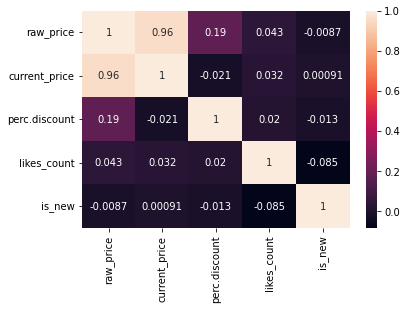

In [53]:
corrMatrix = df_products_and_ratings_ver1[['raw_price','current_price','perc.discount','likes_count','is_new']].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

there is no corellation between likes_count with raw_price, current price, perc.discount, is_new

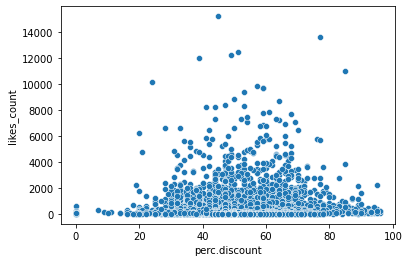

In [54]:
sns.scatterplot(x="perc.discount",
                y="likes_count",
                data = df_products_and_ratings_ver1)
plt.show()

The higher of perc.discount does not make the likes_count higher or lower.

## 8. Recommendation



1.   the most popular product categories are women's products, it is recommended that marketing techniques are more focused on female customers. then to increase the popularity of the least popular products, more massive marketing is carried out such as advertising and collaboration with influencers
2.   in each category the most popular sub-category has been identified, for example the most popular women's product is shirts, the supply of shirt products must be increased. The most popular home product from the product sub category is flowers, so the stock and variety of flowers needs to be increased. Likewise in sub categories in other categories
3.   For more popular brands, collaboration with brands needs to be expanded
4.   There is no need to supply new products all the time, because the novelty of the product is not a consideration for consumers in their purchases
5.   Because most customers are in Thailand, knowing the shopping culture of Thai people needs to be done. and predicting the needs of the Thai people.
6.   The most popular color variations for each product are known, the supply of product inventory based on the most preferred color variations needs to be improved.
7.   there is no relationship between likes count, current price, discount, product novelty, and raw price. Discounts on weekdays do not need to be done because customers shop based on needs and quality, the price of goods is not the main factor (we can do discounts at certain times, eg early month discount, midnight shopping discount, cashback discount, bundle discount)


## 9. Conclusion - Create the story

1.   Based on likes count, the most popular product categories is women's products. Based on the analysis, it is known that most of our customers are women. Therefore, for customers who have given likes, we need to maximize digital marketing by providing recommendation emails to these customers based on the algorithm of dressing styles they like. Then collaboration with influencers to attract more female customers. And also 'gifting' to get customer engagement and retention.
2.   the most popular product sub category data has been displayed in each category. addition of stock items based on these data can help increase sales
3.   Top 5 brands based on likes count are socofy, zanzea, o-newe, ChArmkpR, and Gracila. Bottom brands are Doufit, Camel, Beon, senbono, Nextool By knowing the top and bottom brands, it can help us in making investment decisions or partnership with certain brands. on top brand we can increase investment while on bottom brand we can reconsider or even stop the partnership.
4.   Based on the proportion of likes_count, the novelty of the product is not a problem for potential customers, it is proven that the likes_count of the old product is many times more than the new product.So there is no need to provide new products all the time
5.   The number of potential clients in 6 countries is practically identical and the largest is Thailand. Cooperating with each country's influencers can increase the popularity of products.
6.   The most favorite color variation for women shoes are black and burgundy (vin rouge). We have to adding stock for shoes product categories, especially the black and burgundy color variations
7.   There is no corellation between perc.discount with likes_count. The higher of perc.discount does not make the likes_count higher or lower. From the data it can be seen that the average discount percentage for all products is 52.03% which is of course very large and detrimental, especially after it is known that there is no correlation between perc.discount and likes count. We have to think about a discount strategy. The recommendations I offer are do early month discounts, midnight shopping discounts, and cashback. 



In [ ]:
1 = stop

In [ ]:
df_products_and_ratings_ver1.to_csv(path + 'IC CAPS Product and Rating Fashion Site.csv')